In [1]:
import warnings
warnings.filterwarnings('ignore')

import h5py

import pywt
import wavelets

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from kpnet.cluster import *
from kpnet.handler import *
from kpnet.network import *
from kpnet.signal import *
from kpnet.callback import *
from kpnet.entropy import *

In [2]:
N = 64
time_interval = 2 ** 15

In [3]:
def generate(delay, alpha, beta, gamma, shift=0):
    np.random.seed(0)
    callbacks = {}
    for i in range(1, N):
        callbacks['W_' + str(i)] = Weight0Callback(time_interval, 0, i)
    callbacks['A'] = TotalActivityCallback(time_interval=time_interval)
    signal = SwitchSignal([2000, time_interval], [RandomUnitSignal(N), ZeroSignal(N)])
    net = KPNetworkTanhDelayed(N, delay, alpha, beta, gamma)
    handler = ComputationHandler(time_interval)
    results = handler.run(net, signal, callbacks)

    plt.figure(figsize=(10, 6))
    for key, value in results.items():
        if key[0] == 'W':
            plt.plot(value[shift:])
    plt.grid(True)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$W^{0}_{ij}[t]$')
    plt.show()

    plt.figure(figsize=(10, 6))
    ents = []
    chunk = 2 ** 10
    for i in range(shift // chunk, time_interval // chunk):
        ent = SWTDistribution(results['A'][i * chunk : (i + 1) * chunk], 'db2').entropy
        ents += chunk * [ent]
    plt.plot(ents)
    plt.grid(True)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$WH(|N|_{l_{1}})[t]$')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.specgram(results['A'][shift:], NFFT=256, Fs=1, Fc=0)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$F = 2\pi\omega (Hz)$')
    plt.show()

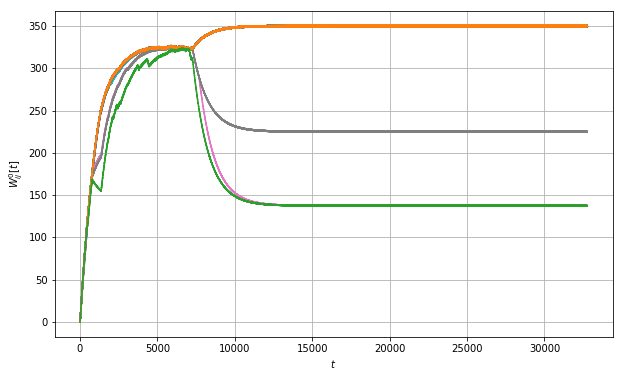

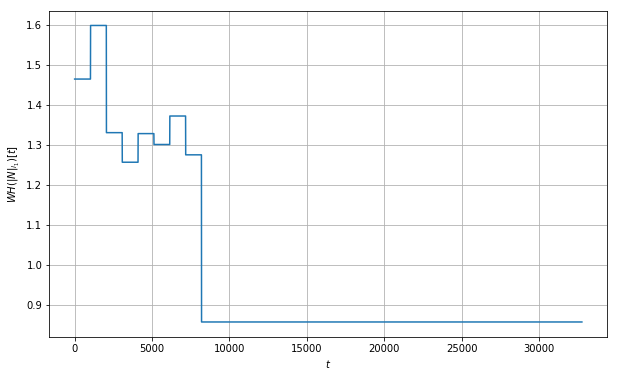

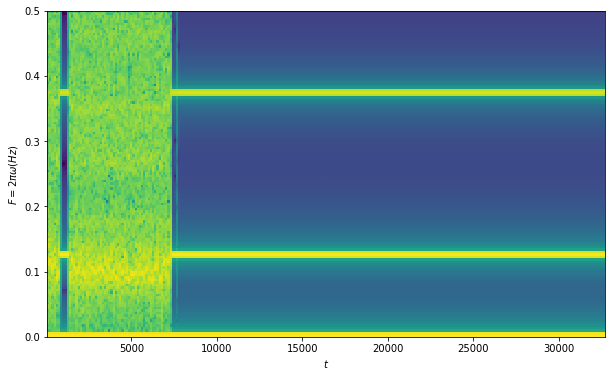

In [4]:
generate(3, alpha = 0.59, beta = 0.3, gamma = 2.2)

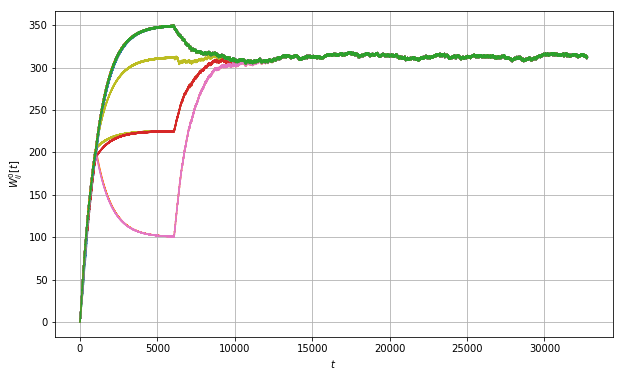

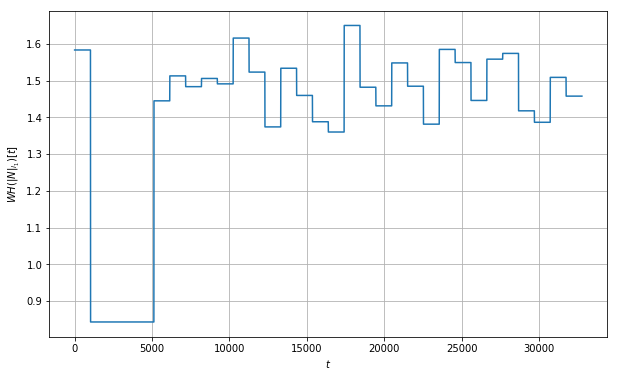

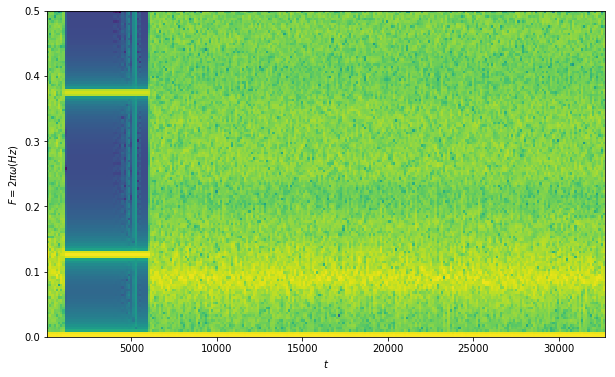

In [5]:
generate(3, alpha = 0.59, beta = 0.3, gamma = 3.2)

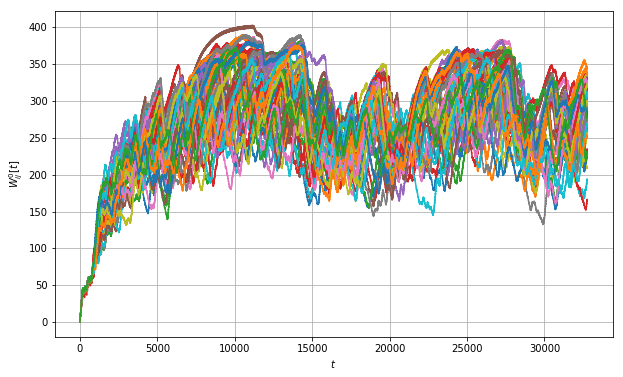

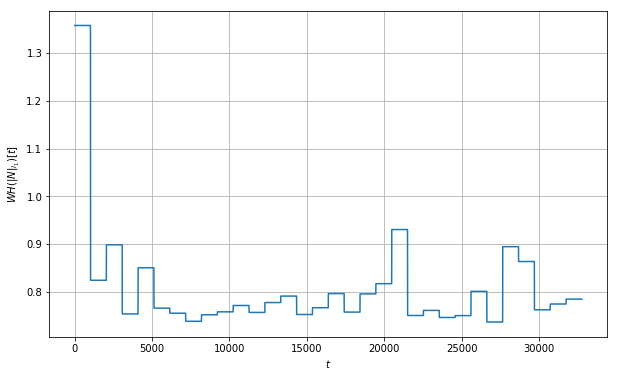

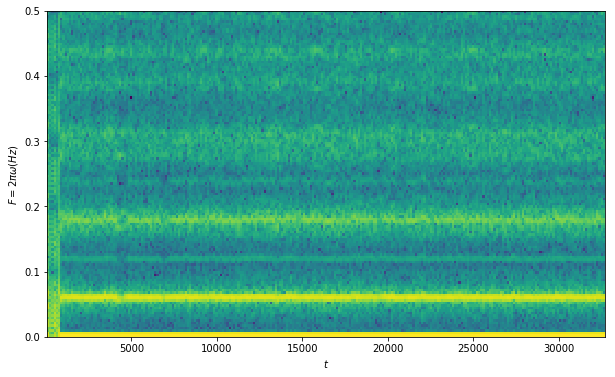

In [6]:
generate(3, alpha = 0.02735, beta = 0.3, gamma = 3.2)

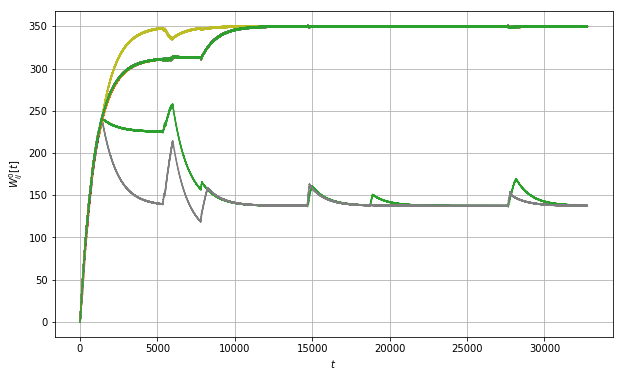

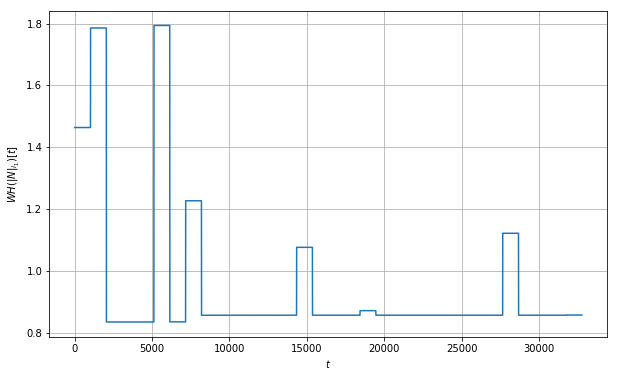

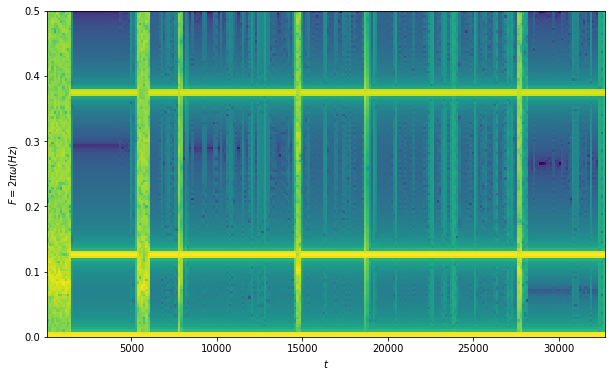

In [7]:
generate(3, alpha = 0.49, beta = 0.3, gamma = 2.2)

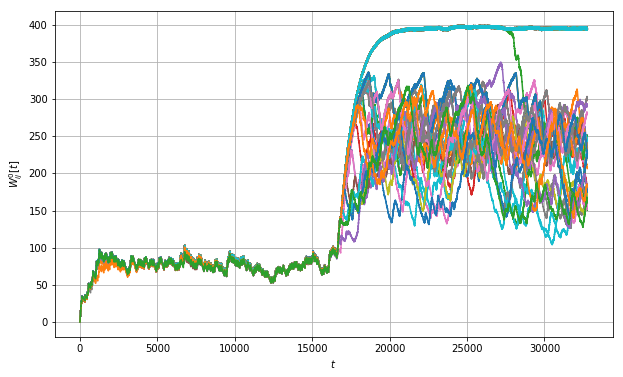

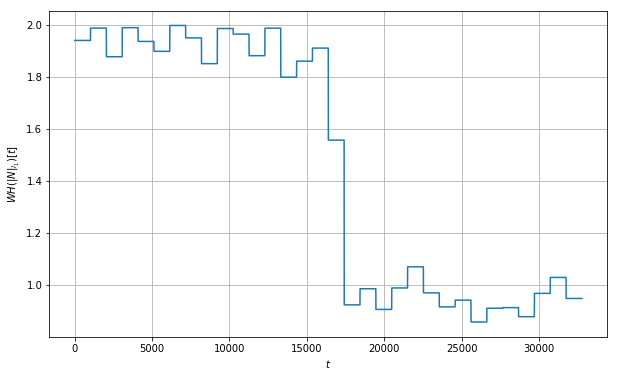

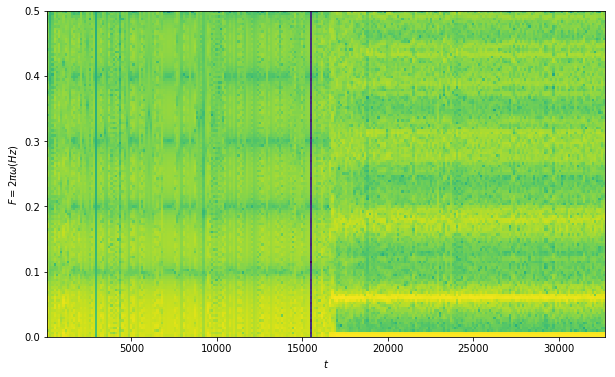

In [8]:
generate(3, alpha = 0.021, beta = 0.3, gamma = 2.2)